## Heart Attack Analysis & Prediction

### 1. Data Analysis
1.1 Basic information
1.2 Types analysis
1.3 Chcecking missing values
1.4 Data balancing

(303, 14)
Column names: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
types;  age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64


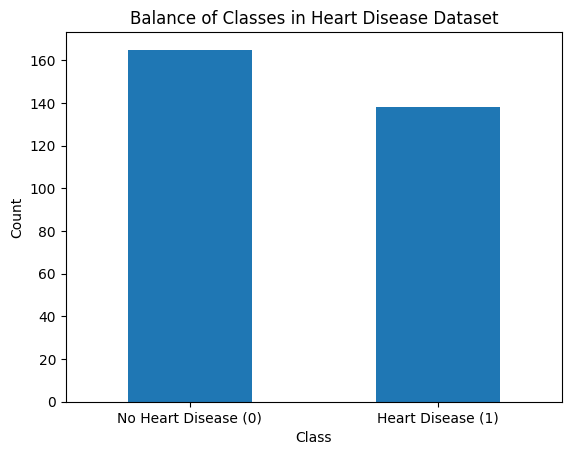

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('heart.csv')
print(df.shape)
# Nazwy kolumn
print(f'Column names:\n {df.columns.tolist()}')
# Wyświetlenie pierwszych kilku wierszy, aby sprawdzić, czy dane zostały poprawnie wczytane
print(df.head())

# Typy danych kolumn
print(f'types:\n {df.dtypes}')

# Liczba brakujących wartości na kolumnę
print(f'null occurrences:\n, {df.isnull().sum()}')

class_counts = df['output'].value_counts()
# Tworzenie wykresu słupkowego dla balansu danych
class_counts.plot(kind='bar')
plt.title('Balance of Classes in Heart Disease Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'], rotation=0)
plt.show()


Conclusion 1: There aren't any missing values.
Conclusion 2: It can be seen that the number of cases for both classes (presence of heart disease (1) and absence of heart disease (0)) is comparable, suggesting relatively good balance of the data. This balance between classes is desirable in data analysis and predictive modeling because it helps prevent the model from being biased towards the dominant class.

### Attributes definitions
age - Age of the person
sex - Gender of the person
cp - Chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
trtbps - Resting blood pressure (in mm Hg)
chol - Cholesterol in mg/dl fetched via BMI sensor
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - Resting electrocardiographic results
thalachh - Maximum heart rate achieved
exng - Exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest